# Natural Language Processing

In this NLP project, I will be attempting to classify Yelp Reviews into 1-star or 5-star categories based on the text content in the reviews.

We will use the Yelp Review Data Set from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars are better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Set up

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Get the data

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df['text length'] = df['text'].apply(lambda x:len(x.split()))
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


## Exploratory Data Analysis

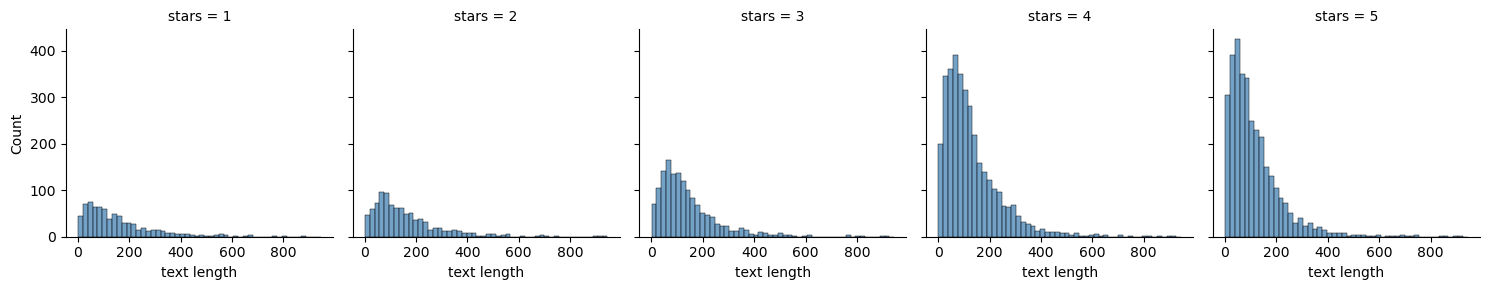

In [38]:
sns.displot(
    data=df,
    x='text length',
    col='stars',
    kind='hist',
    bins=50,
    color='steelblue',
    aspect=1,
    height=3
)
plt.tight_layout()

This plot shows the distribution of review lengths (in words) across different star ratings in the Yelp dataset. Across all panels, review length is heavily right-skewed, meaning most reviews are short, with a long tail of much longer entries. One- and two-star reviews tend to have slightly longer tails, suggesting that dissatisfied users often write more detailed complaints, while four- and five-star reviews cluster more tightly at lower word counts, implying that satisfied users express approval more briefly. The overall pattern indicates that verbosity decreases with higher satisfaction, and that although long reviews occur at every rating, they are relatively more common among negative reviews. This relationship between text length and rating can help interpret sentiment or engagement patterns in user feedback data.

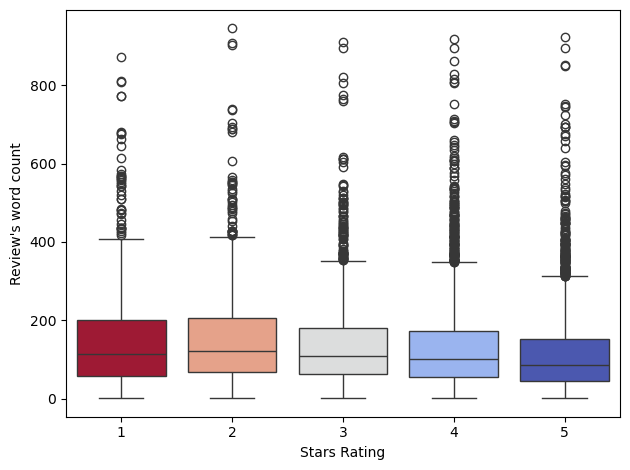

In [8]:
sns.boxplot(data = df, x = 'stars', 
            y = 'text length', 
            hue = 'stars', 
            palette='coolwarm_r', 
            legend=False)
plt.xlabel('Stars Rating')
plt.ylabel("Review's word count")
plt.tight_layout()

This boxplot shows the distribution of review word counts across different star ratings. Consistent with the previous histogram, there is a slight decline in review length as the star rating increases. One- and two-star reviews tend to have higher medians and wider spreads, suggesting that dissatisfied customers often write longer, more detailed feedback. In contrast, four- and five-star reviews are generally shorter and more consistent in length, indicating that positive experiences are typically expressed more concisely. Overall, the plot reinforces the trend that negative reviews are more verbose than positive ones.

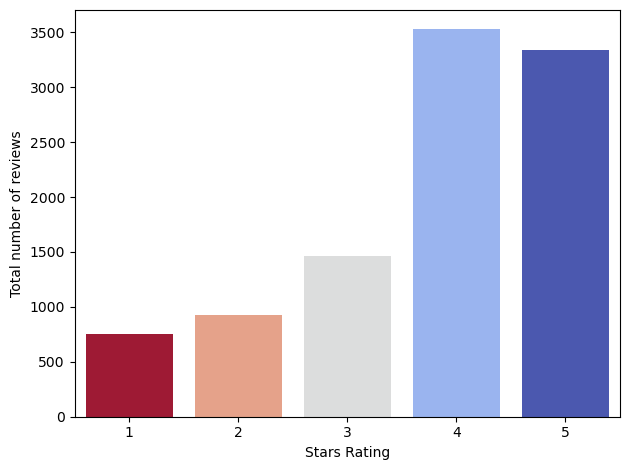

In [9]:
sns.countplot(data = df, x = 'stars', hue = 'stars', palette='coolwarm_r', legend=False)
plt.xlabel('Stars Rating')
plt.ylabel("Total number of reviews")
plt.tight_layout()

This count plot shows how the number of reviews varies across star ratings. The distribution is clearly skewed toward higher ratings, with four- and five-star reviews making up the majority of the dataset. In contrast, one- and two-star reviews are relatively rare, while three-star reviews occupy a middle ground. This imbalance suggests that users are more inclined to leave feedback when they have had a positive experience, a common pattern in online review data where satisfied customers are more vocal than neutral or dissatisfied ones.

Let's explore how the reviews differ in tone given the number of stars, or at least how other rate the review based on the 3 given categories 'cool', 'useful', 'funny'.

In [10]:
df[['stars', 'cool', 'useful', 'funny', 'text length']].groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


**Takeaways**:
* Lower-rated reviews (1–2 stars) tend to receive the highest “useful” scores, suggesting that negative reviews are often viewed as more informative or detailed by other users.
* Conversely, “funny” votes are most common in one-star reviews, implying that critical or sarcastic comments may be perceived as humorous.
* “Cool” votes increase with rating, peaking around four stars, possibly reflecting that well-written positive reviews are seen as stylish or agreeable.
* Finally, text length again shows a decreasing trend with higher ratings, reinforcing that negative reviews tend to be longer and more elaborate than positive ones.

Let's explore the **correlation** among these features.

In [11]:
df.corr(numeric_only=True)

,stars,cool,useful,funny,text length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.121799
cool,0.052555,1.000000,0.887102,0.764342,0.237478
useful,-0.023479,0.887102,1.000000,0.723406,0.290245
funny,-0.061306,0.764342,0.723406,1.000000,0.249076
text length,-0.121799,0.237478,0.290245,0.249076,1.000000


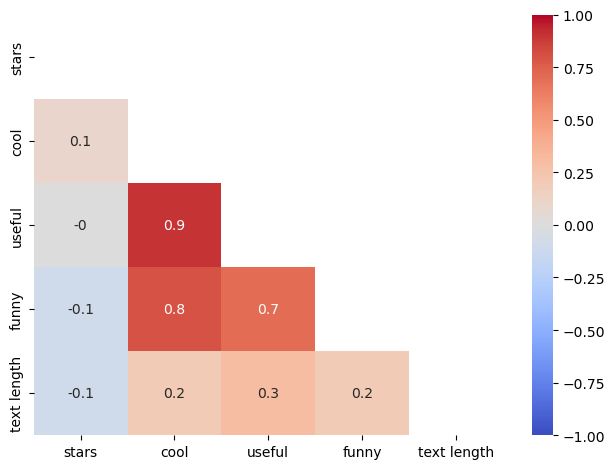

In [12]:
corr_data = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_data, dtype = bool))

sns.heatmap(corr_data.round(1), cmap = 'coolwarm', mask = mask, vmin = -1, vmax = 1, annot = True)
plt.tight_layout()

This correlation heatmap shows how the different review features relate to each other. The variables cool, useful, and funny are strongly and positively correlated with one another, suggesting that reviews perceived as entertaining or engaging tend to also be seen as useful and cool. In contrast, the number of stars has little to no correlation with these engagement metrics, indicating that the tone or reception of a review (how others vote on it) is largely independent of whether it is positive or negative. Finally, text length shows only weak positive correlations with the other features, meaning that longer reviews are slightly more likely to receive engagement votes but not substantially so. Overall, user interaction with reviews seems driven more by content style than by rating score.

## NLP Classification
Let's simplify the task by only caring about reviews with 1 ot 5 stars.

In [46]:
yelp_class = df[(df['stars'] == 1) | (df['stars'] == 5)]

In [47]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [48]:
X = yelp_class['text']
y = yelp_class['stars']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
X = CountVectorizer().fit_transform(X)

### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training a model

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
nb = MultinomialNB()

In [55]:
nb.fit(X_train, y_train)

MultinomialNB()

### Predictions and Evaluations

In [56]:
pred = nb.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
print('=======================================')
print('Model evaluation for the Multinomial NB')
print('=======================================')
print('\n')
print('Confusion matrix')
print('----------------')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,pred))

Model evaluation for the Multinomial NB


Confusion matrix
----------------
[[159  69]
 [ 22 976]]


Classification report
---------------------
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



* The confusion matrix shows that the Multinomial Naive Bayes model performs strongly overall but with a noticeable imbalance in classification performance between the two classes.
    * Out of 228 actual 1-star reviews, the model correctly classified 159 but misclassified 69 as 5-star, indicating some difficulty distinguishing negative reviews.
    * Conversely, it correctly identified 976 out of 998 5-star reviews, misclassifying only 22.
    * This asymmetry reveals that while the model is highly reliable at detecting positive sentiment, it tends to overpredict the dominant 5-star class and underdetect the minority 1-star reviews.
* The classification report further quantifies this imbalance.
    * For 1-star reviews, precision is reasonably high (0.88), meaning that when the model predicts a review as negative, it is usually correct. However, the recall of 0.70 shows that the model fails to capture around 30% of actual 1-star reviews, lowering its F1-score to 0.78.
    * In contrast, 5-star reviews show near-perfect performance, with precision and recall values of 0.93 and 0.98 respectively, resulting in an F1-score of 0.96. The weighted average metrics (precision = 0.92, recall = 0.93, F1 = 0.92) are high because they are dominated by the larger number of 5-star examples.
* In summary, the model demonstrates excellent overall accuracy (93%), successfully identifying most reviews correctly, but it performs better with positive than with negative reviews. The imbalance in recall between classes suggests that the classifier is biased toward predicting the majority class (5-star), a common issue in sentiment datasets with skewed distributions. To enhance performance on 1-star reviews, future iterations could balance the training data or use more sophisticated models capable of capturing subtler linguistic differences in negative feedback.

### Using text processing
i will now include the TF-IDF to this process to see if we improve the model. I will do so through a pipeline.

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

In [60]:
from sklearn.pipeline import Pipeline

In [61]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

Because we overwrote X with the CountVectorized, I need to redo the train/test split.

In [64]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Let now make predictions and evalute the new model

In [66]:
pred_pipe = pipeline.predict(X_test)

In [67]:
print('===================================================')
print('Model evaluation for the Multinomial NB with Tf-Idf')
print('===================================================')
print('\n')
print('Confusion matrix')
print('----------------')
print(confusion_matrix(y_test,pred_pipe))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,pred_pipe))

Model evaluation for the Multinomial NB with Tf-Idf


Confusion matrix
----------------
[[  0 228]
 [  0 998]]


Classification report
---------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This output shows that the Multinomial Naive Bayes model with TF-IDF performed very poorly, completely failing to identify any 1-star reviews. The confusion matrix reveals that the model classified every single review as 5-star, resulting in zero true positives for the 1-star class. Consequently, precision, recall, and F1-score for 1-star reviews are all 0.00, while the 5-star class shows an artificially high recall of 1.00 simply because the model labeled everything as 5-star. Although the overall accuracy appears to be 81%, this is misleading due to class imbalance—the model is only performing well on the dominant class. This behavior indicates that the combination of TF-IDF and MultinomialNB disrupted the model’s probabilistic assumptions, causing it to ignore the minority class entirely and collapse into predicting only the majority class.

### Replacing the MultinomialNB with SVM
The first model using CountVectorizer with MultinomialNB performed well because Multinomial Naive Bayes is mathematically designed to work with raw count data, where features represent discrete word occurrences. In contrast, the second model combined TF-IDF with MultinomialNB, which breaks this assumption by converting counts into continuous, normalised values. As a result, the model’s probability estimates become invalid, causing it to collapse into predicting only the majority class (5-star) and completely fail to identify 1-star reviews. In short, TF-IDF and MultinomialNB are incompatible, and TF-IDF should instead be paired with models like Logistic Regression or Linear SVM that can handle continuous inputs.

In [68]:
from sklearn.svm import LinearSVC

In [69]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC())
])

In [70]:
pipeline_svm.fit(X_train, y_train)
pred_pipe_svm = pipeline_svm.predict(X_test)

In [71]:
print('==============================================')
print('Model evaluation for the SVC model with Tf-Idf')
print('==============================================')
print('\n')
print('Confusion matrix')
print('----------------')
print(confusion_matrix(y_test,pred_pipe_svm))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,pred_pipe_svm))

Model evaluation for the SVC model with Tf-Idf


Confusion matrix
----------------
[[181  47]
 [ 17 981]]


Classification report
---------------------
              precision    recall  f1-score   support

           1       0.91      0.79      0.85       228
           5       0.95      0.98      0.97       998

    accuracy                           0.95      1226
   macro avg       0.93      0.89      0.91      1226
weighted avg       0.95      0.95      0.95      1226



By switching from MultinomialNB to LinearSVC, the model now handles the TF-IDF features correctly, capturing nuanced linguistic patterns in both positive and negative reviews. SVMs naturally work with continuous, scaled data like TF-IDF weights, unlike Naive Bayes, which expects integer counts. The result is a well-balanced, highly accurate text-classification model that generalises well to both classes and maintains strong interpretability.

# --- End of Project!---